In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings("ignore")

In [5]:
df1=pd.read_csv('/content/Banking_Analytics_Transactions_Updated.csv')
df2=pd.read_csv('/content/Banking_Analytics_Dataset.xlsx - Accounts.csv')

In [6]:
df1.keys()

Index(['Unnamed: 0', 'TransactionID', 'AccountID', 'TransactionType', 'Amount',
       'TransactionDate', 'Season'],
      dtype='object')

In [7]:
df2.keys()

Index(['AccountID', 'CustomerID', 'AccountType', 'Balance', 'CreatedDate'], dtype='object')

In [8]:
df1.shape

(20000, 7)

In [9]:
df2.shape

(5000, 5)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20000 non-null  int64  
 1   TransactionID    20000 non-null  int64  
 2   AccountID        20000 non-null  int64  
 3   TransactionType  20000 non-null  object 
 4   Amount           20000 non-null  float64
 5   TransactionDate  20000 non-null  object 
 6   Season           20000 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.1+ MB


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AccountID    5000 non-null   int64 
 1   CustomerID   5000 non-null   int64 
 2   AccountType  5000 non-null   object
 3   Balance      5000 non-null   int64 
 4   CreatedDate  5000 non-null   object
dtypes: int64(3), object(2)
memory usage: 195.4+ KB


In [12]:
df1.isna().sum()

,0
Unnamed: 0,0
TransactionID,0
AccountID,0
TransactionType,0
Amount,0
TransactionDate,0
Season,0


In [13]:
df2.isna().sum()

,0
AccountID,0
CustomerID,0
AccountType,0
Balance,0
CreatedDate,0


In [14]:
df1.duplicated().sum()

np.int64(0)

In [15]:
df2.duplicated().sum()

np.int64(0)

In [16]:
df1.describe()

,Unnamed: 0,TransactionID,AccountID,Amount
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,9999.500000,10000.500000,2500.886000,5005.444508
std,5773.647028,5773.647028,1441.271585,2886.346765
min,0.000000,1.000000,1.000000,10.180000
25%,4999.750000,5000.750000,1256.750000,2527.917500
50%,9999.500000,10000.500000,2503.000000,5011.605000
75%,14999.250000,15000.250000,3740.000000,7495.767500
max,19999.000000,20000.000000,5000.000000,9999.890000


In [17]:
df2.describe()

,AccountID,CustomerID,Balance
count,5000.000000,5000.000000,5000.000000
mean,2500.500000,2524.785800,49874.159000
std,1443.520003,1443.271697,28930.728486
min,1.000000,1.000000,147.000000
25%,1250.750000,1286.000000,24553.750000
50%,2500.500000,2498.500000,49672.000000
75%,3750.250000,3780.000000,75134.250000
max,5000.000000,5000.000000,99968.000000


In [18]:
data= pd.merge(df1, df2, on='AccountID', how='inner')

In [19]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,TransactionID,AccountID,TransactionType,Amount,TransactionDate,Season,CustomerID,AccountType,Balance,CreatedDate
0,1,3913,Transfer,3150.12,2023-09-24,Fall,13,Business,35298,2022-04-16
1,2,2591,Transfer,6212.12,2022-06-07,Summer,1811,Checking,35832,2020-03-27
2,3,3277,Transfer,451.72,2024-11-24,Fall,2274,Checking,43691,2016-06-24
3,4,3404,Deposit,8525.28,2023-04-06,Spring,1981,Business,70547,2025-03-07
4,5,4345,Deposit,7306.17,2025-01-21,Winter,2842,Checking,59084,2020-10-20
...,...,...,...,...,...,...,...,...,...,...
19995,19996,4177,Transfer,1168.80,2024-10-22,Fall,1409,Business,27115,2023-05-26
19996,19997,528,Deposit,2100.16,2024-10-17,Fall,3531,Business,59190,2022-06-11
19997,19998,3197,Transfer,5243.93,2022-11-15,Fall,3330,Savings,27991,2022-03-22
19998,19999,1587,Withdrawal,7622.15,2023-05-30,Spring,3235,Business,30860,2024-10-15


In [20]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['CreatedDate'] = pd.to_datetime(data['CreatedDate'])

data.dtypes

,0
TransactionID,int64
AccountID,int64
TransactionType,object
Amount,float64
TransactionDate,datetime64[ns]
Season,object
CustomerID,int64
AccountType,object
Balance,int64
CreatedDate,datetime64[ns]


In [21]:
data.keys()

Index(['TransactionID', 'AccountID', 'TransactionType', 'Amount',
       'TransactionDate', 'Season', 'CustomerID', 'AccountType', 'Balance',
       'CreatedDate'],
      dtype='object')

In [22]:
data.shape

(20000, 10)

In [23]:
# time mabeen kol transactions sequential
data = data.sort_values(by=['AccountID', 'TransactionDate'])
data['TimeBetweenTransactions'] = data.groupby('AccountID')['TransactionDate'].diff().dt.days
data

,TransactionID,AccountID,TransactionType,Amount,TransactionDate,Season,CustomerID,AccountType,Balance,CreatedDate,TimeBetweenTransactions
14701,14702,1,Deposit,6058.70,2022-05-17,Spring,1828,Savings,53911,2019-06-12,NaN
43,44,1,Withdrawal,4766.38,2022-07-01,Summer,1828,Savings,53911,2019-06-12,45.0
2693,2694,1,Deposit,8813.84,2023-11-01,Fall,1828,Savings,53911,2019-06-12,488.0
15268,15269,1,Withdrawal,6874.07,2024-10-30,Fall,1828,Savings,53911,2019-06-12,364.0
1477,1478,1,Transfer,3707.80,2025-05-01,Spring,1828,Savings,53911,2019-06-12,183.0
...,...,...,...,...,...,...,...,...,...,...,...
16762,16763,4999,Transfer,5866.30,2024-06-01,Summer,4409,Business,85462,2024-07-19,525.0
13932,13933,5000,Transfer,2350.84,2022-05-17,Spring,694,Savings,45620,2015-07-20,NaN
17457,17458,5000,Deposit,7539.87,2023-01-06,Winter,694,Savings,45620,2015-07-20,234.0
2556,2557,5000,Deposit,9137.93,2023-12-24,Winter,694,Savings,45620,2015-07-20,352.0


gives null values because there is no previous transaction

In [24]:
data['TimeBetweenTransactions'].fillna(0, inplace=True)
data

,TransactionID,AccountID,TransactionType,Amount,TransactionDate,Season,CustomerID,AccountType,Balance,CreatedDate,TimeBetweenTransactions
14701,14702,1,Deposit,6058.70,2022-05-17,Spring,1828,Savings,53911,2019-06-12,0.0
43,44,1,Withdrawal,4766.38,2022-07-01,Summer,1828,Savings,53911,2019-06-12,45.0
2693,2694,1,Deposit,8813.84,2023-11-01,Fall,1828,Savings,53911,2019-06-12,488.0
15268,15269,1,Withdrawal,6874.07,2024-10-30,Fall,1828,Savings,53911,2019-06-12,364.0
1477,1478,1,Transfer,3707.80,2025-05-01,Spring,1828,Savings,53911,2019-06-12,183.0
...,...,...,...,...,...,...,...,...,...,...,...
16762,16763,4999,Transfer,5866.30,2024-06-01,Summer,4409,Business,85462,2024-07-19,525.0
13932,13933,5000,Transfer,2350.84,2022-05-17,Spring,694,Savings,45620,2015-07-20,0.0
17457,17458,5000,Deposit,7539.87,2023-01-06,Winter,694,Savings,45620,2015-07-20,234.0
2556,2557,5000,Deposit,9137.93,2023-12-24,Winter,694,Savings,45620,2015-07-20,352.0


BUILDING THE TREE

In [25]:
IF_in_features = ['Amount', 'Balance','TimeBetweenTransactions']

In [26]:
Model = IsolationForest(contamination= 'auto', random_state=42)
Model.fit(data[IF_in_features])

IsolationForest(random_state=42)

In [30]:
data['anomaly_scores'] = Model.decision_function(data[IF_in_features])# the lower the more of an anomaly
data['fraud'] = Model.predict(data[IF_in_features])

In [32]:
def outlier_plot(data, x_var, y_var):

    print(f"Number of anomalous values {len(data[data['fraud']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['fraud']== 1])}")
    print(f'Total Number of Values: {len(data)}')

    g = sns.FacetGrid(data, col='fraud', height=4, hue='fraud', hue_order=[1,-1])
    g.map(sns.kdeplot, x_var, y_var)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['fraud']== -1])} points") # this is fraud transactions
    axes[1].set_title(f"Inliers\n {len(data[data['fraud']==  1])} points") # otherwise
    return g

Number of anomalous values 8263
Number of non anomalous values  11737
Total Number of Values: 20000


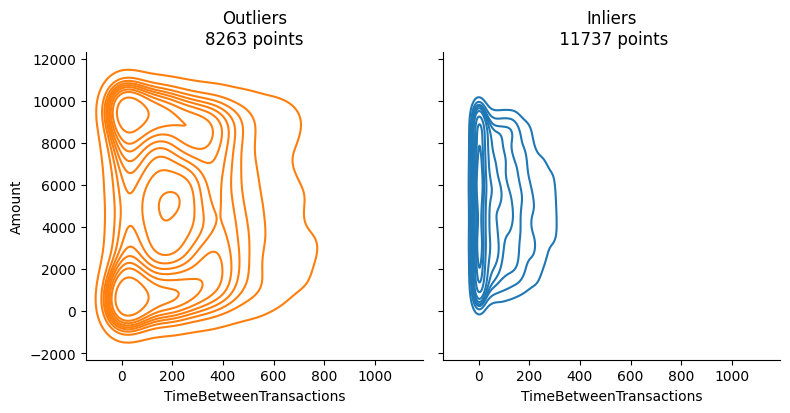

In [33]:
outlier_plot(data, 'TimeBetweenTransactions', 'Amount');

In [34]:
X = data[IF_in_features]
outlier_pred = data['fraud']
outlier_scores = data['anomaly_scores']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# Combine results into a DataFrame
plot_df = pd.DataFrame({
    "PCA_1": X_pca[:, 0], "PCA_2": X_pca[:, 1],
    "TSNE_1": X_tsne[:, 0], "TSNE_2": X_tsne[:, 1],
    "Outlier": outlier_pred,
    "Score": outlier_scores
})

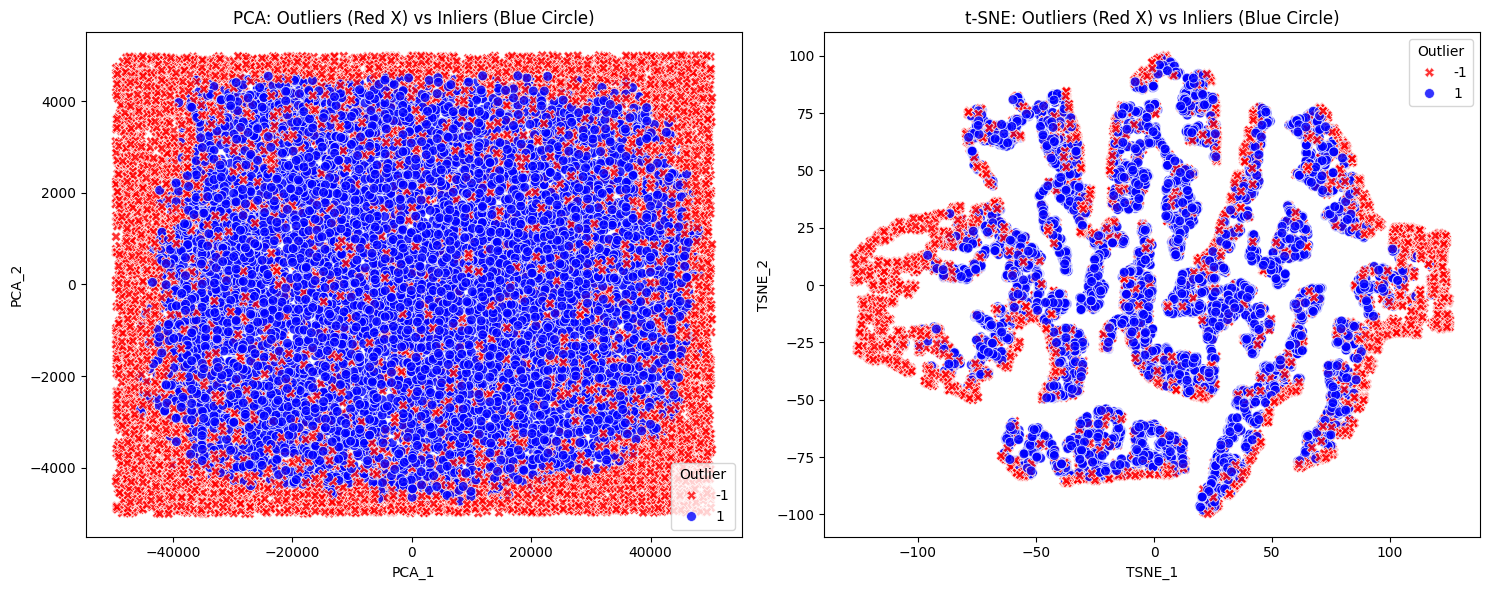

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# PCA Plot
sns.scatterplot(
    data=plot_df, x="PCA_1", y="PCA_2",
    hue="Outlier", palette={1: "blue", -1: "red"},
    style="Outlier", markers={1: "o", -1: "X"},
    s=50, alpha=0.8, ax=ax1
)
ax1.set_title("PCA: Outliers (Red X) vs Inliers (Blue Circle)")

# t-SNE Plot
sns.scatterplot(
    data=plot_df, x="TSNE_1", y="TSNE_2",
    hue="Outlier", palette={1: "blue", -1: "red"},
    style="Outlier", markers={1: "o", -1: "X"},
    s=50, alpha=0.8, ax=ax2
)
ax2.set_title("t-SNE: Outliers (Red X) vs Inliers (Blue Circle)")

plt.tight_layout()
plt.show()

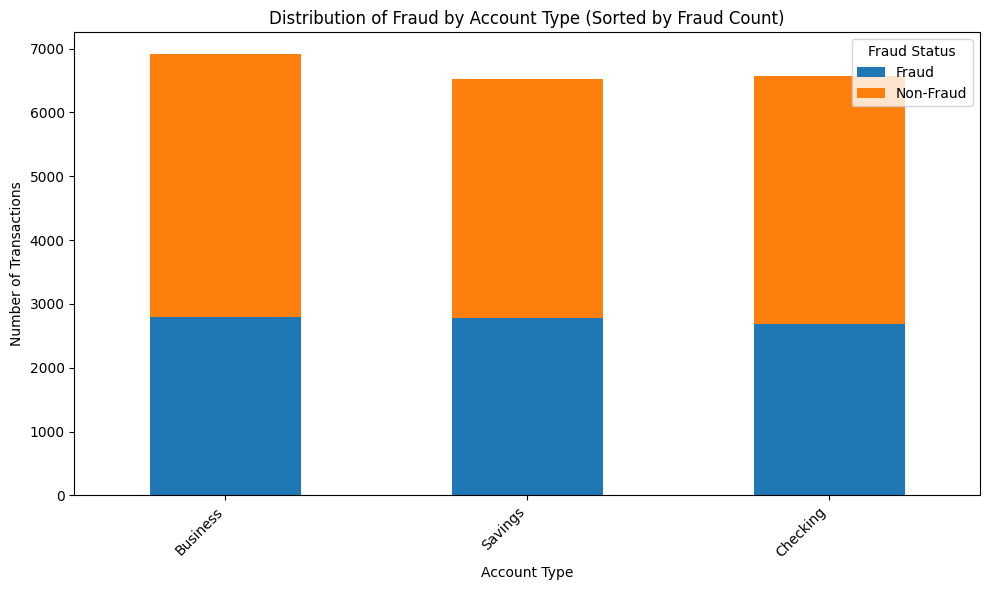

In [36]:
# Calculate the counts of fraud and non-fraud for each AccountType and sort them in descending order
fraud_counts = data.groupby(['AccountType', 'fraud']).size().unstack().fillna(0)
fraud_counts = fraud_counts.rename(columns={-1: 'Fraud', 1: 'Non-Fraud'})

fraud_totals = fraud_counts.loc[:, 'Fraud']
sorted_account_types = fraud_totals.sort_values(ascending=False).index

# Reindex the fraud_counts DataFrame based on the sorted order
fraud_counts_sorted = fraud_counts.reindex(sorted_account_types)

ax = fraud_counts_sorted.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Fraud by Account Type (Sorted by Fraud Count)')
plt.xlabel('Account Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Fraud Status')
plt.tight_layout()
plt.show()

businesss accounts has the most fraud transactions

In [37]:
data

,TransactionID,AccountID,TransactionType,Amount,TransactionDate,Season,CustomerID,AccountType,Balance,CreatedDate,TimeBetweenTransactions,anomaly_scores,fraud
14701,14702,1,Deposit,6058.70,2022-05-17,Spring,1828,Savings,53911,2019-06-12,0.0,0.063367,1
43,44,1,Withdrawal,4766.38,2022-07-01,Summer,1828,Savings,53911,2019-06-12,45.0,0.042800,1
2693,2694,1,Deposit,8813.84,2023-11-01,Fall,1828,Savings,53911,2019-06-12,488.0,-0.066029,-1
15268,15269,1,Withdrawal,6874.07,2024-10-30,Fall,1828,Savings,53911,2019-06-12,364.0,-0.011600,-1
1477,1478,1,Transfer,3707.80,2025-05-01,Spring,1828,Savings,53911,2019-06-12,183.0,0.039857,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16762,16763,4999,Transfer,5866.30,2024-06-01,Summer,4409,Business,85462,2024-07-19,525.0,-0.082344,-1
13932,13933,5000,Transfer,2350.84,2022-05-17,Spring,694,Savings,45620,2015-07-20,0.0,0.044965,1
17457,17458,5000,Deposit,7539.87,2023-01-06,Winter,694,Savings,45620,2015-07-20,234.0,0.012572,1
2556,2557,5000,Deposit,9137.93,2023-12-24,Winter,694,Savings,45620,2015-07-20,352.0,-0.025994,-1
